In [44]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from random import randint, sample
from matplotlib import pyplot as plt
from scipy import stats as st
from sklearn.datasets import load_boston, load_iris


In [2]:
warnings.simplefilter("ignore")

### Отличия моды, медианы и среднего

Среднее - очень чувствительный показатель.

In [3]:
data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print('Среднее набора данных', data.mean())
print('Медиана набора данных', data.median()) 

Среднее набора данных 5.0
Медиана набора данных 5.0


In [4]:
data_new = pd.Series([0, 0.1, 0.2, 0.3, 0.4, 5, 60, 70, 80, 90, 100])
print('Среднее нового набора данных', data_new.mean())
print('Медиана нового набора данных', data_new.median()) 

Среднее нового набора данных 36.90909090909091
Медиана нового набора данных 5.0


Чтобы его сохранить, изменение числа больше среднего потребует симметричного изменения меньшего значения.

In [5]:
data_new = pd.Series([-90, -80, -70, -60, -50, 5, 60, 70, 80, 90, 100])
print('Среднее нового набора данных', data_new.mean())
print('Медиана нового набора данных', data_new.median()) 

Среднее нового набора данных 5.0
Медиана нового набора данных 5.0


При появлении выбросов больше всего меняется среднее значение

In [6]:
# Пусть в классе учится 24 ученика, и они имеют такой рост
height = pd.Series(
    [
        157, 161, 164, 165, 166, 167, 167, 168, 169, 169, 170, 170, 
        170, 171, 172, 172, 172, 172, 172, 173, 173, 173, 174, 174   
    ]
)

In [7]:
# посчитаем среднее
print('Среднее набора данных', height.mean())
print('Медиана набора данных', height.median())

Среднее набора данных 169.20833333333334
Медиана набора данных 170.0


In [8]:
# а как оно изменится, если придет новая очень невысокая ученица?

height_new = pd.concat([height, pd.Series([152])], ignore_index=True)
print('Среднее нового набора данных', height_new.mean())
print('Медиана нового набора данных', height_new.median()) 

Среднее нового набора данных 168.52
Медиана нового набора данных 170.0


У распределений может быть две моды.

In [9]:
# посчитаем моду набора данных
print('Мода набора данных', list(height_new.mode()))

Мода набора данных [172]


In [10]:
# что будет, если сразу два ученика ростом 172 сантиметра перейдут в другой класс
height_new_2 = height_new.copy()
height_new_2.pop(14)
height_new_2.pop(15)
print(len(height_new_2))
print('Мода набора данных', list(height_new_2.mode()))

23
Мода набора данных [170, 172, 173]


Если у выборки есть выбросы или она ассиметрична, лучше выбрать для описания моду или медиану.

Среднее нового набора данных 169.20833333333334
Медиана нового набора данных 170.0
Мода набора данных [172]


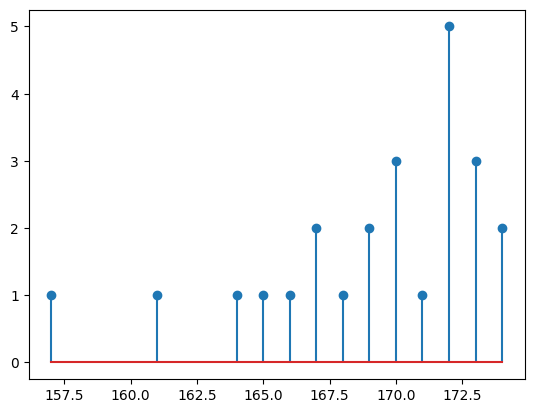

In [11]:
# визуализируем итоговое распределение и посмотрим, что же лучше всего использовать
height_distr = height.value_counts()
plt.stem(height_distr.index, height_distr)

print('Среднее нового набора данных', height.mean())
print('Медиана нового набора данных', height.median()) 
print('Мода набора данных', list(height.mode()))

### Характеристики размаха

In [12]:
height.max() - height.min()

17

#### Ящик с усами

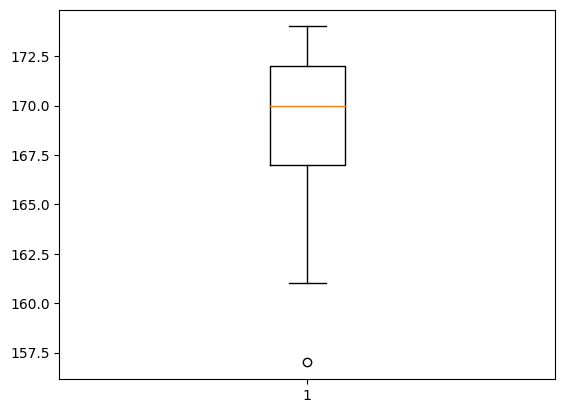

In [13]:
bxplt = plt.boxplot(height);

In [26]:
bxplt['whiskers'][1].get_ydata()

array([172., 174.])

In [14]:
median = np.median(height)
q1 = np.quantile(height, 0.25)
q3 = np.quantile(height, 0.75)
iqr = q3 - q1
print(f'Границы ящика: {q1} - {q3}')

boarder_lower = q1 - 1.5 * iqr
boarder_higher = q3 + 1.5 * iqr

print(f'Границы усов: {boarder_lower} - {boarder_higher}')

Границы ящика: 167.0 - 172.0
Границы усов: 159.5 - 179.5


#### Рассчет выборочной дисперсии

In [27]:
data = [randint(1, 10) for _ in range(100)]
print(np.var(data))

8.85


In [38]:
res = []
for _ in range(100):
    data_sample = sample(data, 10)
    res.append(np.var(data_sample))
np.mean(res)

8.0202

In [39]:
res = []
for _ in range(100):
    data_sample = sample(data, 10)
    res.append(np.var(data_sample, ddof=1))
np.mean(res)

9.079666666666666

In [40]:
print(np.std(data))

2.9748949561287032


In [41]:
res = []
for _ in range(100):
    data_sample = sample(data, 10)
    res.append(np.std(data_sample))
np.mean(res)

2.8121208425460726

In [42]:
res = []
for _ in range(100):
    data_sample = sample(data, 10)
    res.append(np.std(data_sample, ddof=1))
np.mean(res)

2.947598437590102

#### Описательные статистики данных

In [45]:
data = load_iris(as_frame=True)['frame']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Скошенность

Т.к. данные непрерывны, для визуализации используем гистограмму

<AxesSubplot:>

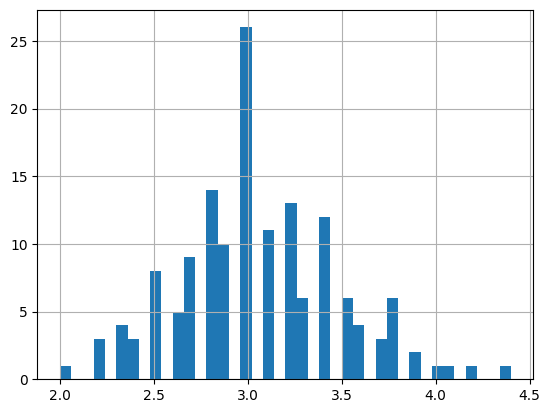

In [49]:
data_to_analyze = data['sepal width (cm)']
data_to_analyze.hist(bins=40)

In [50]:
print(f"Среднее {data_to_analyze.mean()}")
print(f"Медиана {data_to_analyze.median()}")
print(f"Мода {list(data_to_analyze.mode())}")

Среднее 3.0573333333333337
Медиана 3.0
Мода [3.0]


Оценить скошенность можно с помощью функции skew модуля stats библиотеки scipy. Чем полученное значение больше по модулю, тем сильнее скошенность. Если значение отрицательно, имеем отрицательную скошенность, иначе - положительную.

In [51]:
print(f"Скошенность {st.skew(data_to_analyze)}")

Скошенность 0.31576710633893473


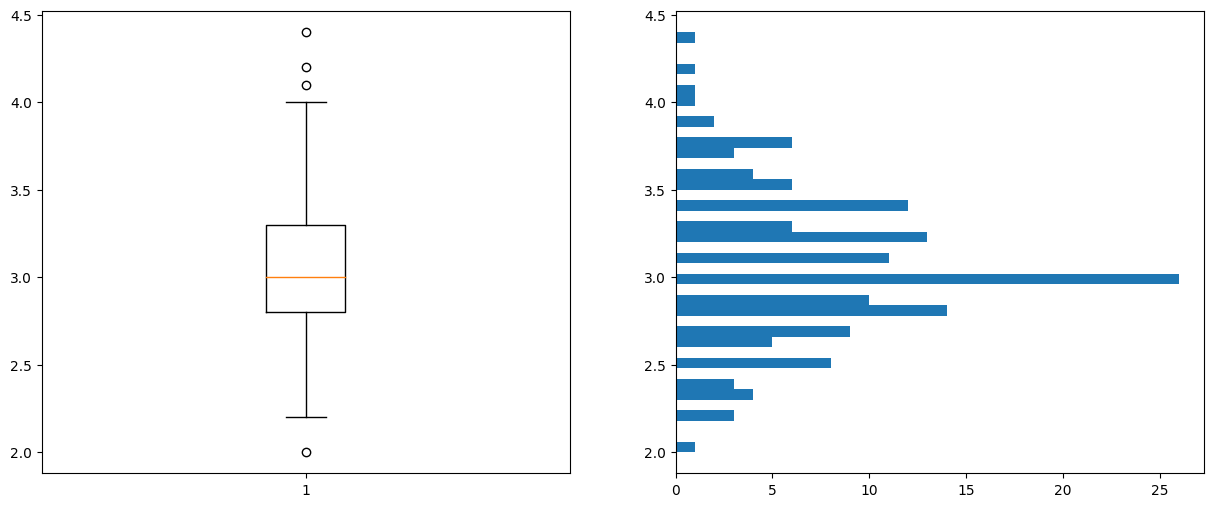

In [53]:
fig, ax =  plt.subplots(1, 2, figsize=[15, 6])
ax[0].boxplot(data_to_analyze);
ax[1].hist(data_to_analyze, bins=40, orientation='horizontal');

### Корреляция

**Корреляцией** называют показатель силы и направления взаимосвязи двух переменных.  
Познакомимся с этим явлением на примере датасета с информацией о домах и их ценах.

In [54]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [55]:
data = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])
data['PRICE'] = load_boston()['target']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Построим матрицу корреляций и визуализируем ее

<AxesSubplot:>

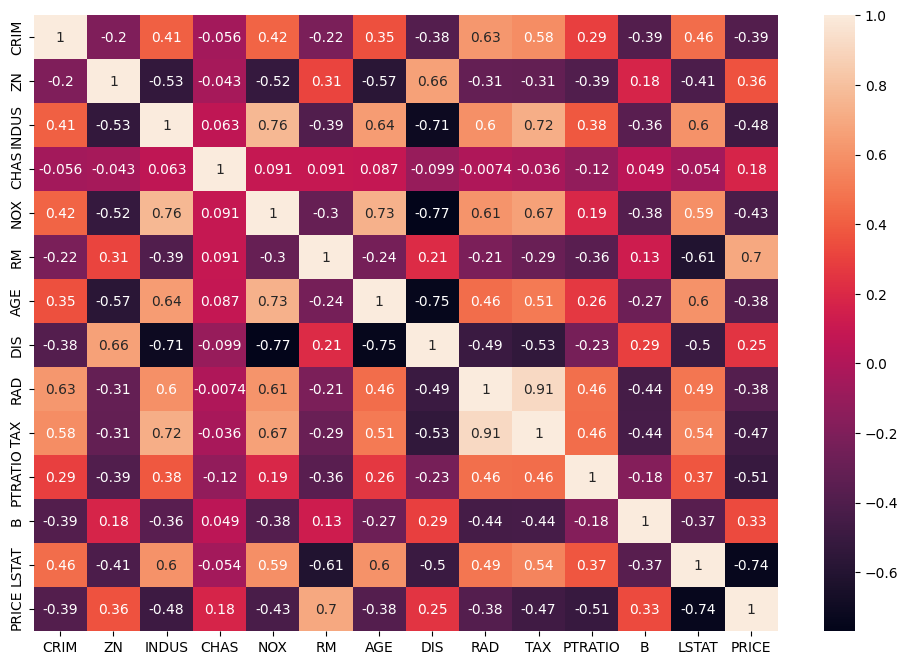

In [57]:
plt.figure(figsize=[12, 8])
sns.heatmap(data.corr(), annot=True)

Помочь визуализировать скоррелированность двух признаков может диаграмма рассеивания

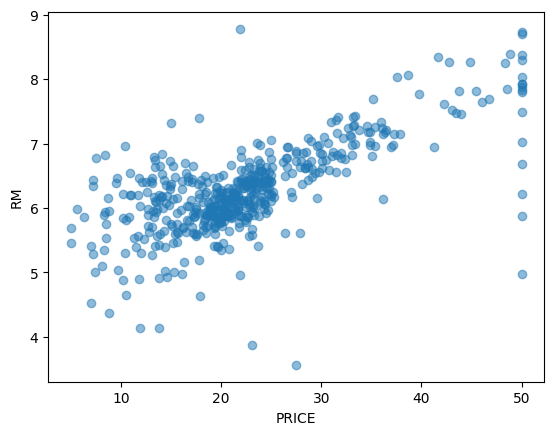

In [58]:
plt.scatter(data['PRICE'], data['RM'], alpha=0.5)
plt.xlabel('PRICE')
plt.ylabel('RM')
plt.show;

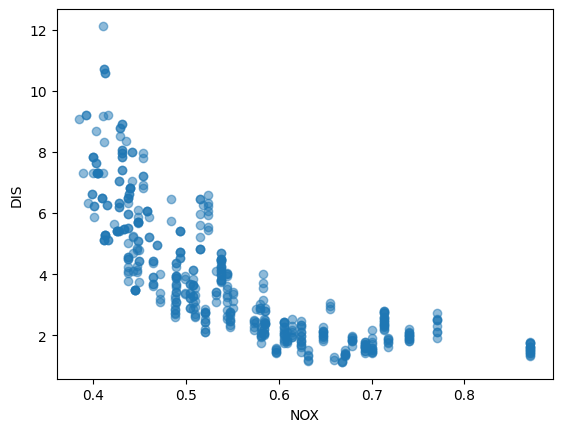

In [59]:
plt.scatter(data['NOX'], data['DIS'], alpha=0.5)
plt.xlabel('NOX')
plt.ylabel('DIS')
plt.show;

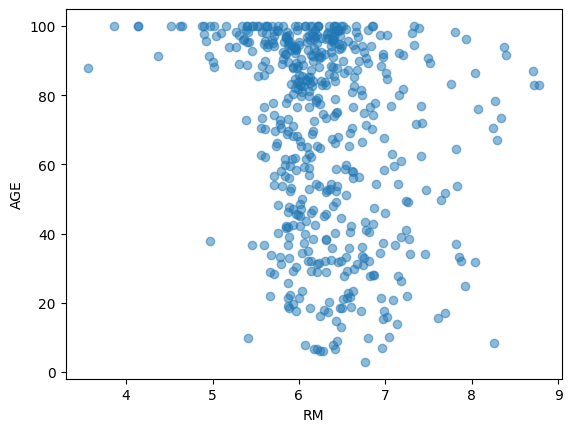

In [60]:
plt.scatter(data['RM'], data['AGE'], alpha=0.5)
plt.xlabel('RM')
plt.ylabel('AGE')
plt.show;